Initial cluster labels: [0, 1, 0, 0, 1, 0]
Initial centroids: [array([2.5 , 2.25]), array([3.5, 2.5])]
Updated cluster labels: [0, 0, 0, 1, 1, 1]
Final cluster labels: [0, 0, 0, 1, 1, 1]
Centroids [array([0.66666667, 3.66666667]), array([5., 1.])]


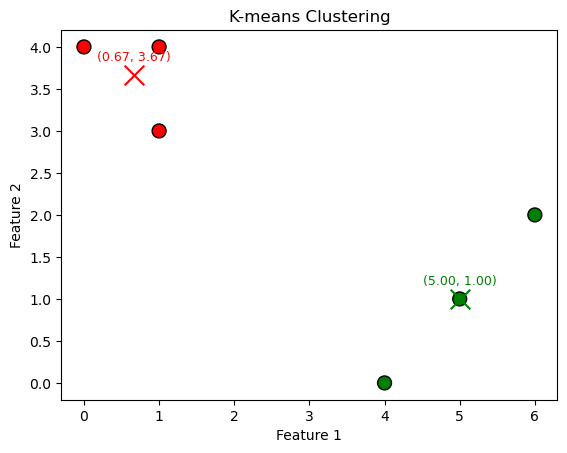

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np
# Given observations


observations = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

# Extract x and y coordinates
x = [obs[0] for obs in observations]
y = [obs[1] for obs in observations]
k = 2

# cluster_labels = random.choices(range(2), k=len(observations))
cluster_labels=[0, 1, 0, 0, 1, 0]
print("Initial cluster labels:", cluster_labels)

centroids = []
for cluster in range(2):
    cluster_points = np.array([observations[i] for i in range(len(observations)) if cluster_labels[i] == cluster])
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# centroids = np.array([[1,4],[0,4]])
print("Initial centroids:", centroids)

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Assign observations to closest centroids
new_labels = []
for observation in observations:
    distances = [euclidean_distance(observation, centroid) for centroid in centroids]

    new_labels.append(np.argmin(distances))

print("Updated cluster labels:", new_labels)
while new_labels != cluster_labels:
    cluster_labels = new_labels.copy()
    centroids = []
    for cluster in range(2):
        cluster_points = np.array([observations[i] for i in range(len(observations)) if cluster_labels[i] == cluster])
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    new_labels = []
    for observation in observations:
        distances = [euclidean_distance(observation, centroid) for centroid in centroids]
        new_labels.append(np.argmin(distances))
    


print("Final cluster labels:", cluster_labels)
print("Centroids",centroids)
colors = ['red', 'green']

# Create the scatter plot with colors based on cluster labels
plt.scatter(x, y, c=[colors[label] for label in cluster_labels], marker='o', s=100, edgecolor='black')
centroid_x = [centroid[0] for centroid in centroids]
centroid_y = [centroid[1] for centroid in centroids]
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], marker='x', s=200, label=f'Centroid {i}')

# Annotate centroids with coordinates
for i, centroid in enumerate(centroids):
    plt.annotate(f'({centroid[0]:.2f}, {centroid[1]:.2f})',
                 (centroid[0], centroid[1]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=9,
                 color=colors[i])
# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Show the plot
plt.show()